In [ ]:
# First I need to categorize the data from my participants
# Trials (1-667 (might have to cut some out)), stimuli_type (Happy vs Angry), response (Approach vs Avoid),% #Congruency (congruent vs incongruent), block_type (stable vs volatile), change objectively correct to accuracy maybe and structure it as (correct vs incorrect), response_time in ms, and reward amount ( -10 or +10 cents)
# mix objectively correct and stimuli type for the Congruency condition  

#My 1st step is to create a data frame where all the participants data is stored

#Import everything 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import glob2
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)

# Now we load the data

In [13]:

data = pd.read_csv(
    '/Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv',
    delimiter=';')

print(data)


     trial  emotional_cue_time response objectively_correct  \
0        0        1.741364e+09       up                Even   
1        1        1.741364e+09     down                Even   
2        2        1.741364e+09      NaN                Late   
3        3        1.741364e+09       up                Even   
4        4        1.741364e+09     down                Even   
5        5        1.741364e+09     down                Even   
6        6        1.741364e+09     down                Even   
7        7        1.741364e+09       up                Even   
8        8        1.741364e+09     down                True   
9        9        1.741364e+09     down                True   
10      10        1.741364e+09       up                True   
11      11        1.741364e+09       up                True   
12      12        1.741364e+09     down                True   
13      13        1.741364e+09       up                True   
14      14        1.741364e+09       up                

# Now I wish to automatize my data frame = concatenate

In [3]:
# Define the base folder and selected subjects
base_folder = "/Volumes/project/3025011.02/raw/"
selected_subjects = ["sub-005", "sub-010", "sub-011", "sub-013", "sub-014"]

all_data = []

# Loop through each subject folder and process `ses-mri01` for now
for subject in selected_subjects:
    # Only focus on `ses-mri01` for now
    session = "ses-mri01"
    beh_folder = os.path.join(base_folder, subject, session, "beh")

    # Ensure the directory exists
    if not os.path.isdir(beh_folder):
        print(f"❌ Directory does not exist: {beh_folder}")
        continue

    # List all CSV files in the folder, but only process 'behavioural_output' files
    csv_files = glob.glob(os.path.join(beh_folder, "behavioural_output*.csv"))

    # If no relevant files are found, skip this subject
    if not csv_files:
        print(f"⚠️ No relevant behavioural CSV files found for {subject} in {session}")
        continue

    # Loop through the relevant CSV files
    for file in csv_files:
        print(f"📂 Reading {file}...")

        try:
            # Read the file with the correct delimiter
            df = pd.read_csv(file, delimiter=';', encoding='utf-8')

            # Check the first few rows to ensure the data is correct
            print(f"📊 Data from {file}:")
            print(df.head())  # Print first few rows to ensure data is being read correctly

            # Drop unwanted columns
            cols_to_drop = ["datapoint", "location_y", "timepoints", "timepoint"]
            df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

            # Remove empty columns
            df = df.dropna(how="all", axis=1)

            # Add subject ID and session columns
            df["subject"] = subject
            df["session"] = session  # Add the session column here

            # Print the cleaned data to verify
            print(f"After cleaning data from {file}:")
            print(df.head())  # Check if data is non-empty

            all_data.append(df)

        except Exception as e:
            print(f"❌ Error reading {file}: {e}")

# Concatenate all DataFrames
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    # Check if combined_df is empty before saving
    if combined_df.empty:
        print("⚠️ DataFrame is empty before saving!")
    else:
        output_path = "/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv"
        combined_df.to_csv(output_path, index=False, sep=";")
        print(f"✅ Combined data saved to {output_path}")
else:
    print("⚠️ No valid data found to concatenate!")



📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv...
📊 Data from /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv:
   trial  emotional_cue_time response objectively_correct  \
0      0        1.741364e+09       up                Even   
1      1        1.741364e+09     down                Even   
2      2        1.741364e+09      NaN                Late   
3      3        1.741364e+09       up                Even   
4      4        1.741364e+09     down                Even   

  subjectively_correct  response_time   RT_s  feedback_time  stimuli_type  \
0                False   1.741364e+09  1.091   1.741364e+09             1   
1                False   1.741364e+09  0.597   1.741364e+09             1   
2                 Late   1.741364e+09  1.213   1.741364e+09             1   
3                False   1.741364e+09  1.094   1.741364

# Now I need to categorize my data: 


In [4]:
#I have also started to think on how to categorize the data and then what to do with it. I was thinking on something like trials (1-667 (might have to cut some out)), stimuli_type (Happy vs Angry), response (Approach vs Avoid), Congruency (congruent vs incongruent), block_type (stable vs volatile), change objectively correct to accuracy maybe and structure it as (correct vs incorrect), response_time in ms, and reward amount ( -10 or +10 cents)
#Mix objectively correct and stimuli type to create congruency 

# Define base directory
base_folder = "/Volumes/project/3025011.02/raw/"
selected_subjects = ["sub-005", "sub-010", "sub-011", "sub-013", "sub-014"]

all_data = []

for subject in selected_subjects:
    session = "ses-mri01"
    beh_folder = os.path.join(base_folder, subject, session, "beh")

    if not os.path.isdir(beh_folder):
        print(f"❌ Directory does not exist: {beh_folder}")
        continue

    csv_files = glob.glob(os.path.join(beh_folder, "behavioural_output*.csv"))

    if not csv_files:
        print(f"⚠️ No relevant behavioural CSV files found for {subject} in {session}")
        continue

    for file in csv_files:
        print(f"📂 Reading {file}...")

        try:
            df = pd.read_csv(file, delimiter=";", encoding="utf-8")

            # Drop unwanted columns
            cols_to_drop = ["emotional_cue_time", "subjectively_correct", "feedback_time", "face_type", "response_time",
                            "stimuli_name"]
            df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors="ignore")

            # Remove empty columns
            df = df.dropna(how="all", axis=1)

            # Add subject ID and session columns
            df["subject"] = subject
            df["session"] = session

            # --- CATEGORIZE DATA --- #

            # Ensure trial column exists before filtering
            if "trial" in df.columns:
                df = df[df["trial"].between(1, 667)]

            # Categorize stimuli type
            df["stimuli_type"] = df["stimuli_type"].map({1: "Angry", 2: "Happy"})

            # Categorize response as Approach vs. Avoid (fixed mapping)
            df["response"] = df["response"].map({"up": "Avoid", "down": "Approach"})

            # Ensure reward amount is -10 or +10 cents
            # Ensure reward_amount is numeric to avoid errors
            df["reward_amount"] = pd.to_numeric(df["reward_amount"], errors="coerce")

            # Calculate change in reward amount per trial
            #df["reward_change"] = df["reward_amount"].diff()
            df["reward_change"] = df["reward_amount"].diff().round(2)  # Round to 2 decimal places
            df["reward_display"] = df["reward_change"].map({0.10: "+10 cents", -0.10: "-10 cents"}).fillna("unknown")

            # Define congruency based on stimuli type and response
            df["congruency"] = "incongruent"  # Default
            df.loc[(df["stimuli_type"] == "Happy") & (df["response"] == "Approach"), "congruency"] = "congruent"
            df.loc[(df["stimuli_type"] == "Angry") & (df["response"] == "Avoid"), "congruency"] = "congruent"

            all_data.append(df)

        except Exception as e:
            print(f"❌ Error reading {file}: {e}")

# Concatenate all DataFrames
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    if combined_df.empty:
        print("⚠️ DataFrame is empty before saving!")
    else:
        output_path = "/Users/carlacoca/Documents/master_internship/outputs_final_data/categorized_df.csv"
        combined_df.to_csv(output_path, index=False, sep=";")
        print(f"✅ Categorized data saved to {output_path}")
else:
    print("⚠️ No valid data found to concatenate!")


📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri01/beh/behavioural_output_sub-010_session-01_dummy_2025-03-11_11-18-41.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-011/ses-mri01/beh/behavioural_output_sub-011_session-01_dummy_2025-03-19_16-39-58.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-013/ses-mri01/beh/behavioural_output_sub-013_session-01_dummy_2025-03-20_13-19-45.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-014/ses-mri01/beh/behavioural_output_sub-014_session-01_dummy_2025-03-21_10-45-03.csv...
✅ Categorized data saved to /Users/carlacoca/Documents/master_internship/outputs_final_data/categorized_df.csv


In [6]:
#After talking with kenneth changes must be made here 
#There is a very small block right after the two stable blocks that should be considered stable instead of volatile as participants have no idea what’s going on there-> only very first time they experience a volatile block not for the rest of the volatile periods 
# Same happens after 6-8-10 trials when they restart a stable block-> label it as volatile 
# Look into 80-20 and fix up that column; you have to filter out 50 (corresponds to 9 first trials) as that is only the very beginning of the trials-80/20 determine reward and how participant should act (joystick action)

#I should organise my data by subject_id, trial, stimuli_type and probability conditions then I could add switch and volatility
# stimuli_type and probability_condition are intertiwned to calculate switch; we are looking at within comparisons of categories so we need to take both into account, this is also why the order is relevant

base_folder = "/Volumes/project/3025011.02/raw/"
selected_subjects = ["sub-005", "sub-010", "sub-011", "sub-013", "sub-014"]

all_data = []

for subject in selected_subjects:
    session = "ses-mri01"
    beh_folder = os.path.join(base_folder, subject, session, "beh")

    if not os.path.isdir(beh_folder):
        print(f"❌ Directory does not exist: {beh_folder}")
        continue

    csv_files = glob.glob(os.path.join(beh_folder, "behavioural_output*.csv"))

    if not csv_files:
        print(f"⚠️ No relevant behavioural CSV files found for {subject} in {session}")
        continue

    for file in csv_files:
        print(f"📂 Reading {file}...")

        try:
            df = pd.read_csv(file, delimiter=";", encoding="utf-8")

            # Drop unwanted columns
            cols_to_drop = ["emotional_cue_time", "subjectively_correct", "feedback_time", "face_type", "response_time",
                            "stimuli_name", "congruency"]
            df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors="ignore")

            # Remove empty columns
            df = df.dropna(how="all", axis=1)

            # Add subject ID and session columns
            df["subject"] = subject
            df["session"] = session

            df = df.sort_values(['subject', 'session', 'stimuli_type', 'trial'])

            # --- CATEGORIZE DATA --- #

            # Ensure trial column exists before filtering
            if "trial" in df.columns:
                df = df[df["trial"].between(1, 667)]

            # Categorize stimuli type
            df["stimuli_type"] = df["stimuli_type"].map({1: "Angry", 2: "Happy"})

            # Remove rows with probability_condition == 50
            df = df[df["probability_condition"] != 50]

            # Categorize response as Approach vs. Avoid (fixed mapping)
            df["response"] = df["response"].map({"up": "Avoid", "down": "Approach"})

            # Ensure reward amount is numeric
            df["reward_amount"] = pd.to_numeric(df["reward_amount"], errors="coerce")

            # Calculate change in reward amount per trial
            df["reward_change"] = df["reward_amount"].diff().round(2)  # Round to 2 decimal places
            df["reward_display"] = df["reward_change"].map({0.10: "+10 cents", -0.10: "-10 cents"}).fillna("unknown")

            # Define congruency based on stimuli type and response
            df["congruency_response"] = "incongruent"  # Default
            df.loc[
                (df["stimuli_type"] == "Happy") & (df["response"] == "Approach"), "congruency_response"] = "congruent"
            df.loc[(df["stimuli_type"] == "Angry") & (df["response"] == "Avoid"), "congruency_response"] = "congruent"

            # WE WANT To see congruency_condition where we look at the underlying probability condition; the condition that gives the highest chance of giving a reward 
            df['task_congruency'] = np.where(df['response'] == df['objectively_correct'], 'congruent', 'incongruent')

            # Create a 'switch' column 
            df['switch'] = (df['probability_condition'] != df['probability_condition'].shift(1)).astype(int)
            df.loc[df.index[0], 'switch'] = 0  # Ensure first trial isn't marked as a switch
            #we add time_since_switch column now
            # Initialize the column
            df['time_since_switch'] = 0

            counter = 0

            for i in df.index:
                if df.loc[i, 'switch'] == 1:
                    counter = 0
                else:
                    if i != df.index[0]:
                        counter += 1
                df.loc[i, 'time_since_switch'] = counter

            #we add a volatility column
            # Step 1: Identify switch groups
            df['switch_group'] = df['switch'].cumsum()

            # Step 2: Compute the size of each block
            group_sizes = df.groupby('switch_group').size()

            # Step 3: Map group sizes back to original dataframe
            df['block_size'] = df['switch_group'].map(group_sizes)

            # Step 4: Assign volatility based on block size
            df['volatility'] = np.where(df['block_size'] > 20, 'stable', 'volatile')

            all_data.append(df)

        except Exception as e:
            print(f"❌ Error reading {file}: {e}")

# Concatenate all DataFrames
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    if combined_df.empty:
        print("⚠️ DataFrame is empty before saving!")
    else:
        # Reorder and sort
        preferred_order = ["subject", "session", "stimuli_type", "trial", "probability_condition", "switch",
                           "time_since_switch", "volatility"]
        other_columns = [col for col in combined_df.columns if col not in preferred_order]
        combined_df = combined_df[preferred_order + other_columns]

        output_path = "/Users/carlacoca/Documents/master_internship/outputs_final_data/categorized_df.csv"
        combined_df.to_csv(output_path, index=False, sep=";")
        print(f"✅ Categorized data saved to {output_path}")
else:
    print("⚠️ No valid data found to concatenate!")


📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri01/beh/behavioural_output_sub-010_session-01_dummy_2025-03-11_11-18-41.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-011/ses-mri01/beh/behavioural_output_sub-011_session-01_dummy_2025-03-19_16-39-58.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-013/ses-mri01/beh/behavioural_output_sub-013_session-01_dummy_2025-03-20_13-19-45.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-014/ses-mri01/beh/behavioural_output_sub-014_session-01_dummy_2025-03-21_10-45-03.csv...
✅ Categorized data saved to /Users/carlacoca/Documents/master_internship/outputs_final_data/categorized_df.csv


In [19]:
#LET'S TRY TO FIX UP THE VOLATILITY COLUMN HERE TILL WE GET IT RIGHT

base_folder = "/Volumes/project/3025011.02/raw/"
selected_subjects = ["sub-005", "sub-010", "sub-011", "sub-013", "sub-014"]

all_data = []

for subject in selected_subjects:
    session = "ses-mri01"
    beh_folder = os.path.join(base_folder, subject, session, "beh")

    if not os.path.isdir(beh_folder):
        print(f"❌ Directory does not exist: {beh_folder}")
        continue

    csv_files = glob.glob(os.path.join(beh_folder, "behavioural_output*.csv"))

    if not csv_files:
        print(f"⚠️ No relevant behavioural CSV files found for {subject} in {session}")
        continue

    for file in csv_files:
        print(f"📂 Reading {file}...")

        try:
            df = pd.read_csv(file, delimiter=";", encoding="utf-8")

            # Drop unwanted columns
            cols_to_drop = ["emotional_cue_time", "subjectively_correct", "feedback_time", "face_type", "response_time",
                            "stimuli_name", "congruency"]
            df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors="ignore")

            # Remove empty columns
            df = df.dropna(how="all", axis=1)

            # Add subject ID and session columns
            df["subject"] = subject
            df["session"] = session

            df = df.sort_values(['subject', 'session', 'stimuli_type', 'trial'])

            # --- CATEGORIZE DATA --- #

            # Ensure trial column exists before filtering
            if "trial" in df.columns:
                df = df[df["trial"].between(1, 667)]

            # Categorize stimuli type
            df["stimuli_type"] = df["stimuli_type"].map({1: "Angry", 2: "Happy"})

            # Remove rows with probability_condition == 50
            df = df[df["probability_condition"] != 50]

            # Categorize response as Approach vs. Avoid (fixed mapping)
            df["response"] = df["response"].map({"up": "Avoid", "down": "Approach"})

            # Ensure reward amount is numeric
            df["reward_amount"] = pd.to_numeric(df["reward_amount"], errors="coerce")

            # Calculate change in reward amount per trial
            df["reward_change"] = df["reward_amount"].diff().round(2)  # Round to 2 decimal places
            df["reward_display"] = df["reward_change"].map({0.10: "+10 cents", -0.10: "-10 cents"}).fillna("unknown")

            # Define congruency based on stimuli type and response
            df["congruency_response"] = "incongruent"  # Default
            df.loc[
                (df["stimuli_type"] == "Happy") & (df["response"] == "Approach"), "congruency_response"] = "congruent"
            df.loc[(df["stimuli_type"] == "Angry") & (df["response"] == "Avoid"), "congruency_response"] = "congruent"

            # WE WANT To see congruency_condition where we look at the underlying probability condition; the condition that gives the highest chance of giving a reward 
            df['task_congruency'] = np.where(df['response'] ==
                                             df['objectively_correct'], 'congruent', 'incongruent')

            # Step 1: Identify block transitions and assign group labels
            df['switch'] = (df['probability_condition'] != df['probability_condition'].shift(1)).astype(int)
            df.loc[df.index[0], 'switch'] = 0  # First trial is not a switch
            df['switch_group'] = df['switch'].cumsum()

            # Step 2: Time since switch and block size
            df['time_since_switch'] = df.groupby('switch_group').cumcount()
            block_sizes = df.groupby('switch_group')['trial'].transform('count')
            df['block_size'] = block_sizes

            # Step 3: Default perceived volatility (all stable)
            df['volatility'] = 'stable'

            # Step 4: First block is always volatile
            first_group = df['switch_group'].min()
            df.loc[df['switch_group'] == first_group, 'volatility'] = 'volatile'

            # Step 5: For all other blocks, apply lag logic
            # Define a function to apply to each block
            def assign_volatility(group):
                if group.name == first_group:
                 return group  # already marked as volatile

                prev_vol = df.loc[df['switch_group'] == group.name - 1, 'volatility'].iloc[0]
                is_stable = group['block_size'].iloc[0] > 20

                group = group.copy()  # to avoid SettingWithCopyWarning
                group.loc[group['time_since_switch'] < 6, 'volatility'] = prev_vol
                group.loc[group['time_since_switch'] >= 6, 'volatility'] = 'stable' if is_stable else 'volatile'
                return group
            df = df.groupby('switch_group', group_keys=False).apply(assign_volatility, include_groups=False)


            all_data.append(df)

        except Exception as e:
            print(f"❌ Error reading {file}: {e}")

# Concatenate all DataFrames
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    if combined_df.empty:
        print("⚠️ DataFrame is empty before saving!")
    else:
        # Reorder and sort
        preferred_order = ["subject", "session", "stimuli_type", "trial", "probability_condition", "switch",
                           "time_since_switch", "volatility"]
        other_columns = [col for col in combined_df.columns if col not in preferred_order]
        combined_df = combined_df[preferred_order + other_columns]

        output_path = "/Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv"
        combined_df.to_csv(output_path, index=False, sep=";")
        print(f"✅ Categorized data saved to {output_path}")
else:
    print("⚠️ No valid data found to concatenate!")

📂 Reading /Volumes/project/3025011.02/raw/sub-005/ses-mri01/beh/behavioural_output_sub-005_session-01_dummy_2025-03-07_17-11-43.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-010/ses-mri01/beh/behavioural_output_sub-010_session-01_dummy_2025-03-11_11-18-41.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-011/ses-mri01/beh/behavioural_output_sub-011_session-01_dummy_2025-03-19_16-39-58.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-013/ses-mri01/beh/behavioural_output_sub-013_session-01_dummy_2025-03-20_13-19-45.csv...
📂 Reading /Volumes/project/3025011.02/raw/sub-014/ses-mri01/beh/behavioural_output_sub-014_session-01_dummy_2025-03-21_10-45-03.csv...
✅ Categorized data saved to /Users/carlacoca/Documents/master_internship/outputs_final_data/final_df.csv


# Let's do a couple graphs to test our data frame 

subject
sub-014    328
Name: count, dtype: int64


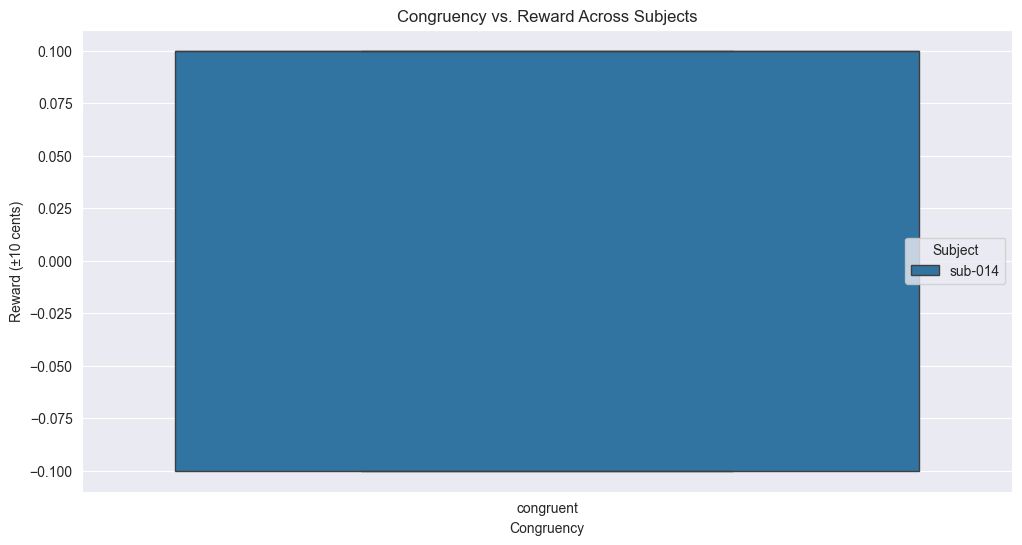

In [6]:
#Hello

# Specify the subjects you want
selected_subjects = ["sub-005", "sub-010", "sub-011", "sub-013", "sub-014"]

# Convert subject column to string to avoid dtype mismatch
df["subject"] = df["subject"].astype(str)

# Filter dataset
df_filtered = df[df["subject"].isin(selected_subjects)].copy()

# Convert reward column to 2 decimals
df_filtered["reward_numeric"] = df_filtered["reward_change"].round(2)

# Drop rows with missing values in relevant columns
df_filtered = df_filtered.dropna(subset=["reward_numeric", "congruency", "subject"])

# Check if filtering worked
print(df_filtered["subject"].value_counts())  # Should list counts for all subjects

# Create the plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x="congruency", y="reward_numeric", hue="subject")

plt.title("Congruency vs. Reward Across Subjects")
plt.xlabel("Congruency")
plt.ylabel("Reward (±10 cents)")
plt.legend(title="Subject")
plt.show()


/var/folders/pf/qmvpxd8n4fs_3kydh8z2_yww0000gn/T/ipykernel_2629/4167528682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="congruency", palette="coolwarm")
/var/folders/pf/qmvpxd8n4fs_3kydh8z2_yww0000gn/T/ipykernel_2629/4167528682.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Accuracy")


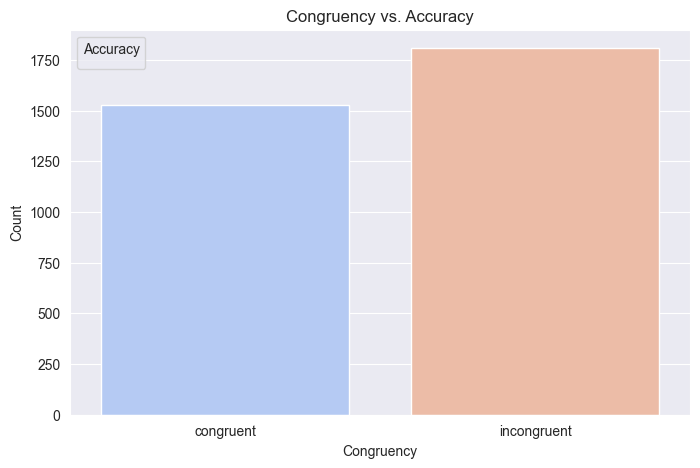

In [28]:
# Load your categorized data
df = pd.read_csv("/Users/carlacoca/Documents/master_internship/outputs_final_data/categorized_df.csv", delimiter=";")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="congruency", palette="coolwarm")

plt.xlabel("Congruency")
plt.ylabel("Count")
plt.title("Congruency vs. Accuracy")
plt.legend(title="Accuracy")
plt.show()
